# Solution

## Q1

In [ ]:
#City wise percentage
import pandas as pd
import numpy as np 
df=pd.read_csv('startup_funding.csv',encoding='utf-8')
df['CityLocation'].dropna(inplace=True)
def separateCity(city): 
    return city.split('/')[0].strip() 
df['CityLocation']=df['CityLocation'].apply(separateCity) 
df['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
df['CityLocation'].replace("bangalore","Bangalore",inplace=True) 

def str_int(v):
    return float(str(v).replace(",",""))
df['AmountInUSD']=df['AmountInUSD'].apply(str_int)
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
city_funding=df.groupby("CityLocation")['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_funding.index
fundingCity=city_funding.values
fundingAmount=np.true_divide(fundingCity,fundingCity.sum())*100
for i in range(len(city)):
    print(city[i],format(fundingAmount[i],'0.2f'))
    
plt.bar(city,fundingAmount)
plt.title('City vs Percentage of funding')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

In [ ]:
import pandas as pd
import numpy as np 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city): 
    return city.split('/')[0].strip() 
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity) 
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True) 
city_number=df_start['CityLocation'].value_counts()[0:10] 
city=city_number.index 
numCity=city_number.values 
for i in range(len(city)): 
    print(city[i],numCity[i])
    
    
plt.bar(city,numCity)
plt.title('City vs Frequency of funding')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

## Q2

In [11]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['InvestorsName'].dropna(inplace=True)
def createDictionary(array):
    dictionary={} 
    for i in array: 
        if ',' not in i: 
            dictionary[i]=dictionary.get(i,0)+1 
        else: 
            string=i.strip().split(',') 
            for j in string: 
                if j.strip() in dictionary: 
                    dictionary[j.strip()]=dictionary.get(j.strip(),0)+1 
                else: 
                    dictionary[j.strip()]=1 
    return dictionary 
dictionary=createDictionary(df_start['InvestorsName']) 
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys())) 
dataf=dataf.sort_values(by=[0],ascending=False) 
#print(dataf.index[0],dataf.values[0][0])
print(dataf[0:5])
index=dataf.index[0:5]
values=dataf[0][0:5]

                       0
Sequoia Capital       64
Accel Partners        53
Kalaari Capital       44
SAIF Partners         41
Indian Angel Network  40


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

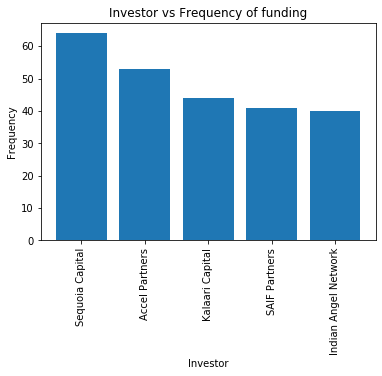

In [12]:
plt.bar(index,values)
plt.title('Investor vs Frequency of funding')
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

## Q3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv')
df=data.copy()
### Change all important name to correct name
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
startupName_list=list(df["StartupName"])
investorsName_list=list(df["InvestorsName"])

#DICTIONARY FOR INVESTORS
d={}
for i in range(len(investorsName_list)):
    investors=investorsName_list[i].split(',')
    for investor in investors:
        investor=investor.strip()
        if investor !='':
            if investor in d:
                s=d[investor]
                s.add(startupName_list[i])
                d[investor]=s          
            else:
                d[investor]={startupName_list[i]}

for key in d:
    d[key]=len(d[key])
    
    
investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))
dummyDF=pd.DataFrame()

dummyDF['investor_name']=investor_name
dummyDF['number_of_fundings']=number_of_fundings

TopF=dummyDF.sort_values(by=['number_of_fundings'],ascending=False)[:5]

print(TopF)


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

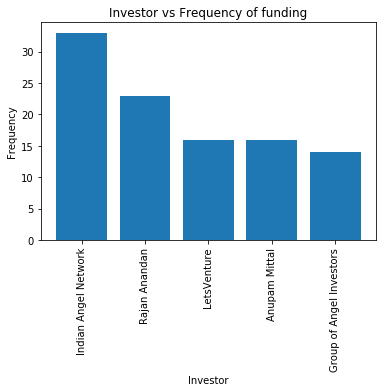

In [5]:
plt.bar(TopF['investor_name'],TopF['number_of_fundings'][0:5])
plt.title('Investor vs Frequency of funding')
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

### Q4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'startup_funding.csv'
df = pd.read_csv(path,skipinitialspace = True)
df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startupName_list=list(df["StartupName"])
investorsName_list=list(df["InvestorsName"])

#DICTIONARY FOR INVESTORS
d={}
for i in range(len(investorsName_list)):
    investors=investorsName_list[i].split(',')
    for investor in investors:
        investor=investor.strip()
        if investor !='' and (investor != "Undisclosed Investors"):
            if investor in d:
                s=d[investor]
                s.add(startupName_list[i])
                d[investor]=s          
            else:
                d[investor]={startupName_list[i]}

for key in d:
    d[key]=len(d[key])
    
    
investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))
dummyDF=pd.DataFrame()

dummyDF['investor_name']=investor_name
dummyDF['number_of_fundings']=number_of_fundings

TopF=dummyDF.sort_values(by=['number_of_fundings'],ascending=False)[:5]

print(TopF)


                 investor_name  number_of_fundings
39        Indian Angel Network                  33
37               Rajan Anandan                  23
8                  LetsVenture                  16
9                Anupam Mittal                  16
1360  Group of Angel Investors                  14


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

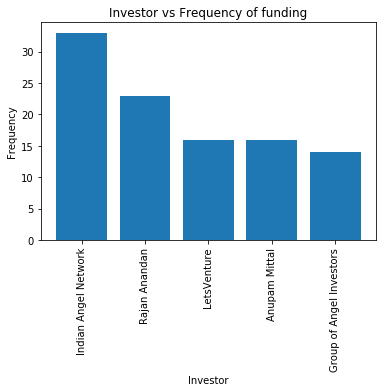

In [6]:
plt.bar(TopF['investor_name'],TopF['number_of_fundings'])
plt.title('Investor vs Frequency of funding')
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

### Q5

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'startup_funding.csv'
df = pd.read_csv(path,skipinitialspace = True)
df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Private Equity')]

startupName_list=list(df["StartupName"])
investorsName_list=list(df["InvestorsName"])

#DICTIONARY FOR INVESTORS
d={}
for i in range(len(investorsName_list)):
    investors=investorsName_list[i].split(',')
    for investor in investors:
        investor=investor.strip()
        if investor !='' and (investor != "Undisclosed Investors"):
            if investor in d:
                s=d[investor]
                s.add(startupName_list[i])
                d[investor]=s          
            else:
                d[investor]={startupName_list[i]}

for key in d:
    d[key]=len(d[key])
    
    
investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))
dummyDF=pd.DataFrame()

dummyDF['investor_name']=investor_name
dummyDF['number_of_fundings']=number_of_fundings

TopF=dummyDF.sort_values(by=['number_of_fundings'],ascending=False)[:5]

print(TopF)

       investor_name  number_of_fundings
84   Sequoia Capital                  45
10    Accel Partners                  43
6    Kalaari Capital                  35
39    Blume Ventures                  27
108    SAIF Partners                  24


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

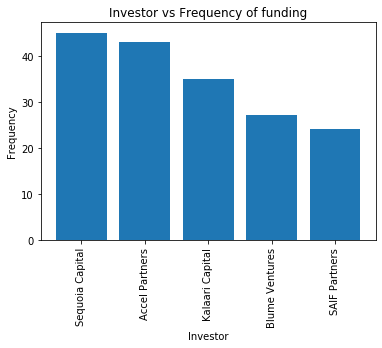

In [10]:
plt.bar(TopF['investor_name'],TopF['number_of_fundings'])
plt.title('Investor vs Frequency of funding')
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)